In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importation et exploration de la base de données : 

In [36]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [37]:
data.info()
# On remarque qu'il y a des valeurs manquantes dans la variables (total_bedrooms)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
# On va créer une nouvelle df, là ou on supprime les valeurs manquantes
data_1 = data.dropna()
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# 1er Modele ML : 


In [39]:
from sklearn.model_selection import train_test_split

X = data_1.drop(['median_house_value'], axis = 1)
y = data_1['median_house_value']

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

16346
4087
16346
4087


In [40]:
data_1_train = X_train.join(y_train)
data_1_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19484,-120.98,37.65,36.0,826.0,167.0,432.0,150.0,2.5000,INLAND,103100.0
4298,-118.29,34.09,28.0,1562.0,648.0,1974.0,597.0,1.9766,<1H OCEAN,112500.0
5992,-117.71,34.08,26.0,2744.0,494.0,1411.0,465.0,4.2639,INLAND,154200.0
6379,-118.05,34.17,45.0,2535.0,455.0,1036.0,437.0,5.0482,INLAND,388900.0
5142,-118.27,33.96,42.0,796.0,203.0,697.0,177.0,2.0370,<1H OCEAN,92600.0
...,...,...,...,...,...,...,...,...,...,...
6432,-118.01,34.12,43.0,1185.0,207.0,657.0,198.0,4.5491,INLAND,214800.0
3809,-118.46,34.21,7.0,2081.0,657.0,1456.0,535.0,3.5000,<1H OCEAN,186900.0
18749,-122.28,40.50,21.0,2405.0,476.0,1197.0,412.0,2.6488,INLAND,83100.0
797,-122.08,37.63,33.0,691.0,127.0,431.0,149.0,4.2500,NEAR BAY,192600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

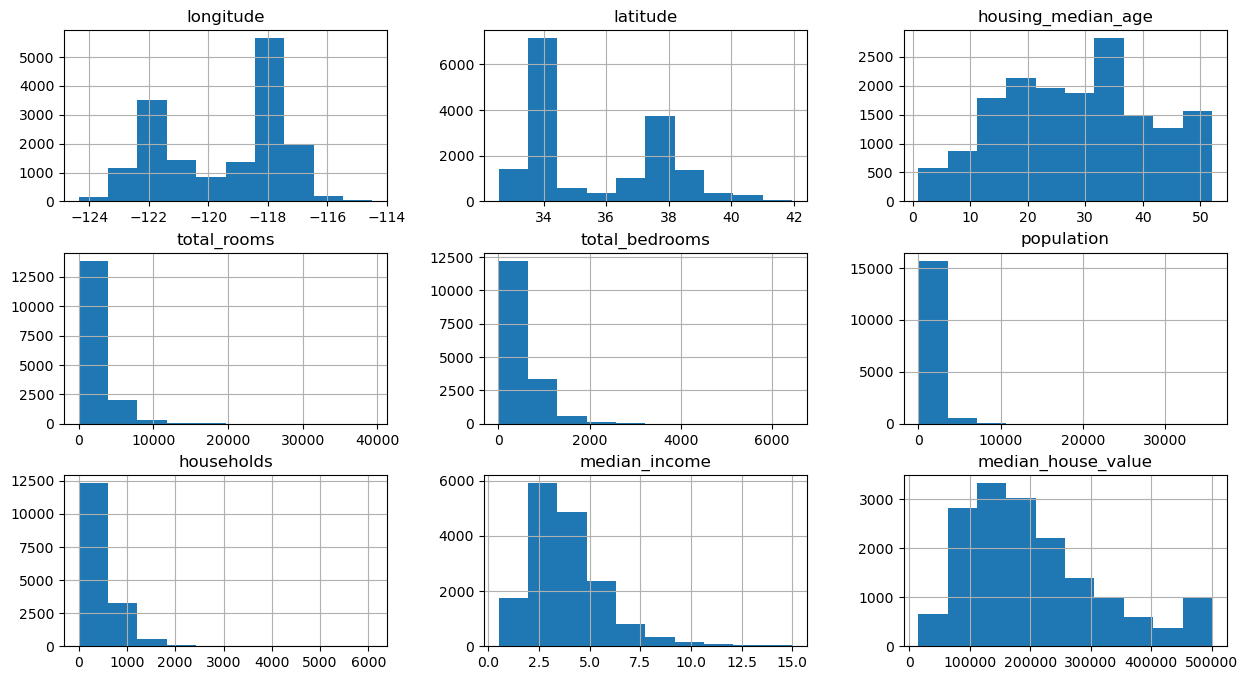

In [41]:
data_1_train.hist(figsize=(15,8))

# On remarque que les variables : total_rooms, total_bedrooms, population et households
# ne sont pas distribué selon une loi normale

<Axes: >

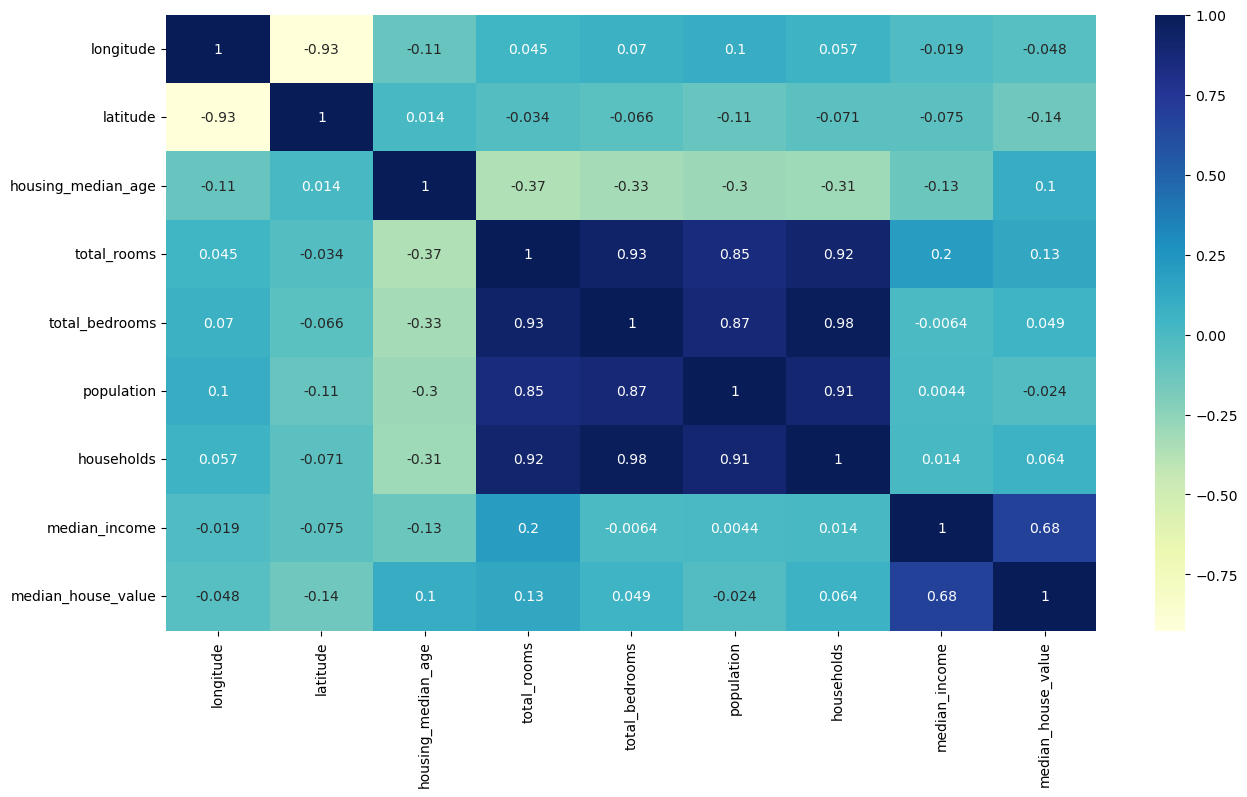

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(data_1_train.drop(['ocean_proximity'], axis=1).corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

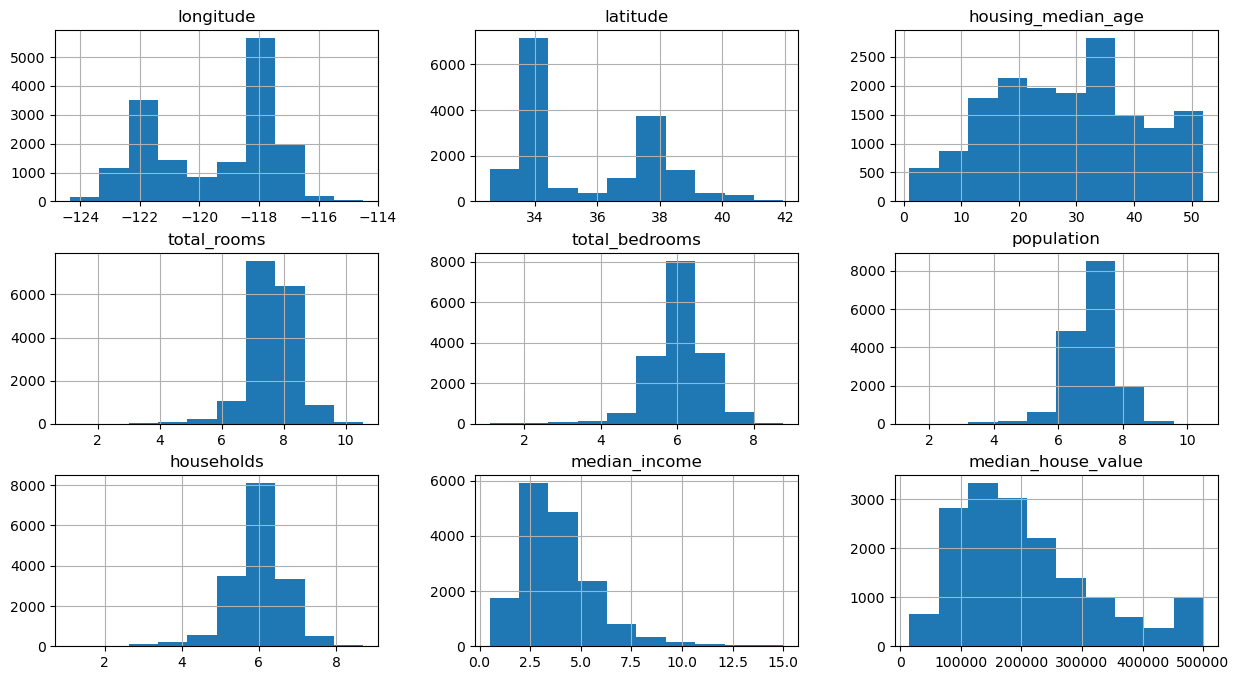

In [43]:
# ditribution normal
data_1_train['total_rooms'] = np.log(data_1_train['total_rooms'] + 1)
data_1_train['total_bedrooms'] = np.log(data_1_train['total_bedrooms'] + 1)
data_1_train['population'] = np.log(data_1_train['population'] + 1)
data_1_train['households'] = np.log(data_1_train['households'] + 1)

data_1_train.hist(figsize=(15,8))

In [44]:
data_1_train.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7259
INLAND        5149
NEAR OCEAN    2106
NEAR BAY      1830
ISLAND           2
Name: count, dtype: int64

In [45]:
# data_1_train= data_1_train.join(pd.get_dummies(data_1_train.ocean_proximity)).drop(['ocean_proximity'], axis=1)

numerical_mapping = {
    '<1H OCEAN' : 1,
    'INLAND' : 2,
    'NEAR OCEAN' : 3,
    'NEAR BAY' : 4,
    'ISLAND' : 5        
}

data_1_train['ocean_proximity'] = data_1_train['ocean_proximity'].map(numerical_mapping)

In [46]:
data_1_train['ocean_proximity'].value_counts()

ocean_proximity
1    7259
2    5149
3    2106
4    1830
5       2
Name: count, dtype: int64

In [47]:
data_1_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19484,-120.98,37.65,36.0,6.717805,5.123964,6.070738,5.017280,2.5000,2,103100.0
4298,-118.29,34.09,28.0,7.354362,6.475433,7.588324,6.393591,1.9766,1,112500.0
5992,-117.71,34.08,26.0,7.917536,6.204558,7.252762,6.144186,4.2639,2,154200.0
6379,-118.05,34.17,45.0,7.838343,6.122493,6.944087,6.082219,5.0482,2,388900.0
5142,-118.27,33.96,42.0,6.680855,5.318120,6.548219,5.181784,2.0370,1,92600.0
...,...,...,...,...,...,...,...,...,...,...
6432,-118.01,34.12,43.0,7.078342,5.337538,6.489205,5.293305,4.5491,2,214800.0
3809,-118.46,34.21,7.0,7.641084,6.489205,7.284135,6.284134,3.5000,1,186900.0
18749,-122.28,40.50,21.0,7.785721,6.167516,7.088409,6.023448,2.6488,2,83100.0
797,-122.08,37.63,33.0,6.539586,4.852030,6.068426,5.010635,4.2500,4,192600.0


<Axes: >

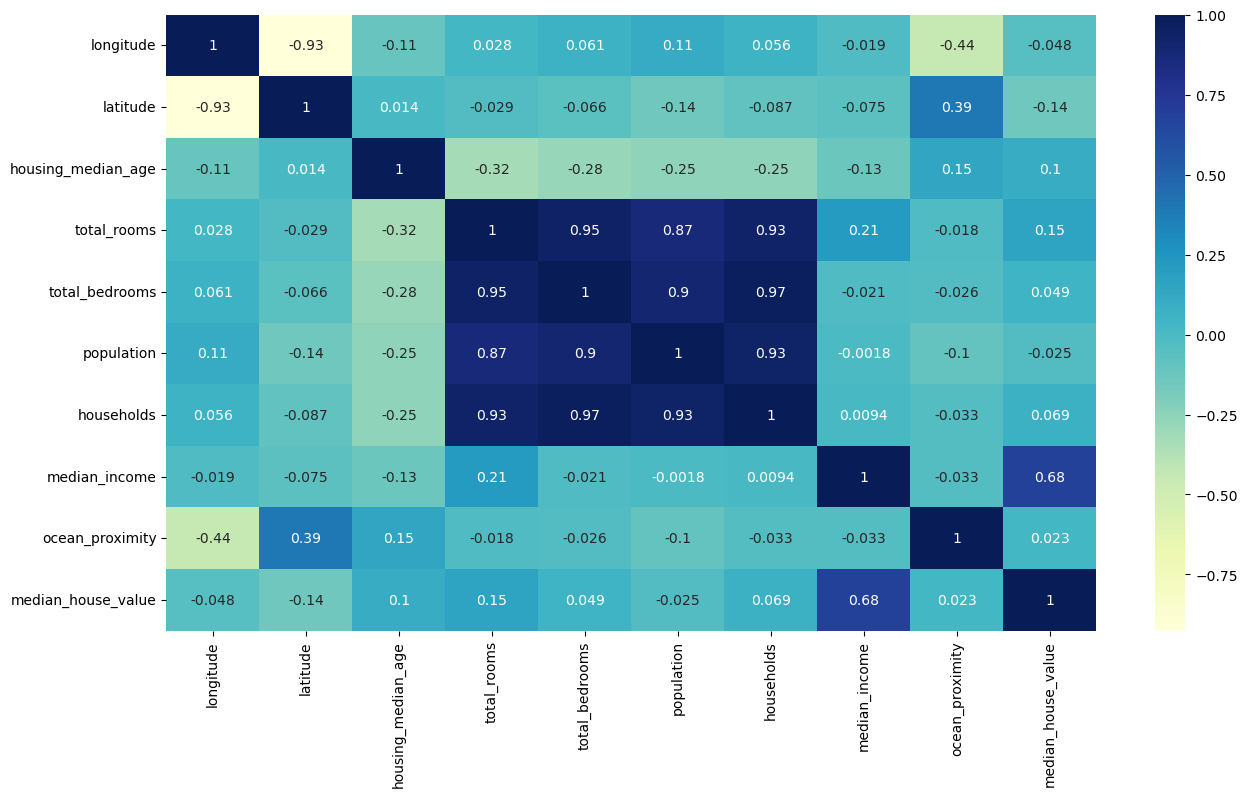

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(data_1_train.corr(), annot=True, cmap="YlGnBu")

<Figure size 1500x800 with 0 Axes>

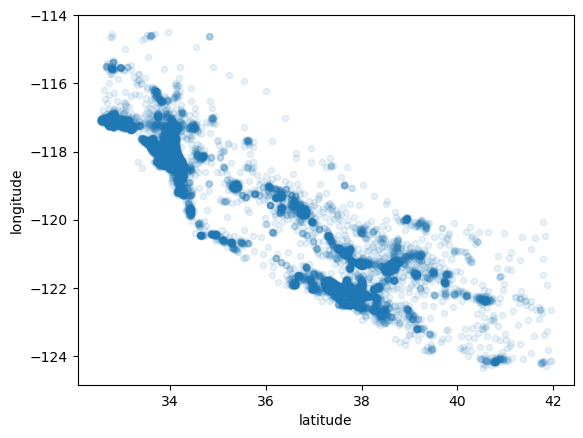

<Figure size 1500x800 with 0 Axes>

In [49]:
data_1_train.plot(kind='scatter', x='latitude', y='longitude', alpha=0.1)
plt.figure(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

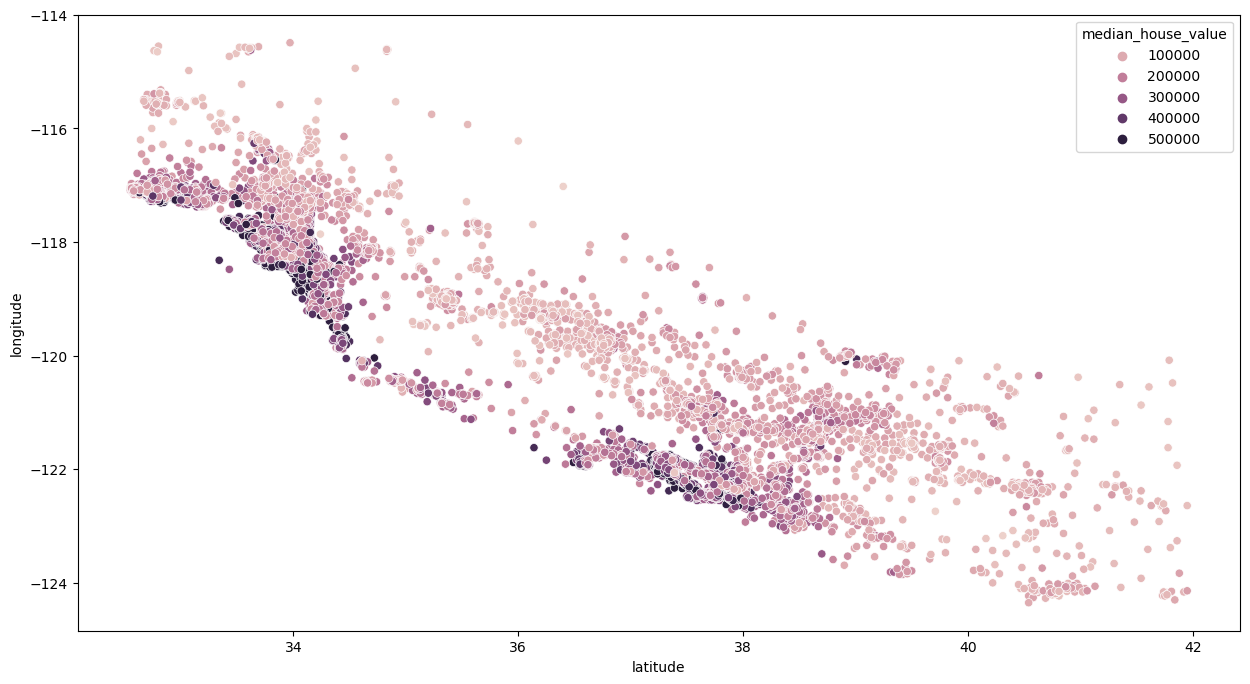

In [50]:
plt.figure(figsize=(15,8))
sns.scatterplot(data_1_train, x='latitude', y='longitude', hue="median_house_value")

In [52]:
data_1_train["rooms_per_households"] = data_1_train["total_rooms"]/data_1_train["households"]
# le nombre de piece dans un foyer par le nombre d'occupant 
#
data_1_train["population_per_households"] = data_1_train["population"]/data_1_train["households"]
# 
data_1_train["bedrooms_per_rooms"]= data_1_train["total_bedrooms"]/data_1_train["total_rooms"]

<Axes: >

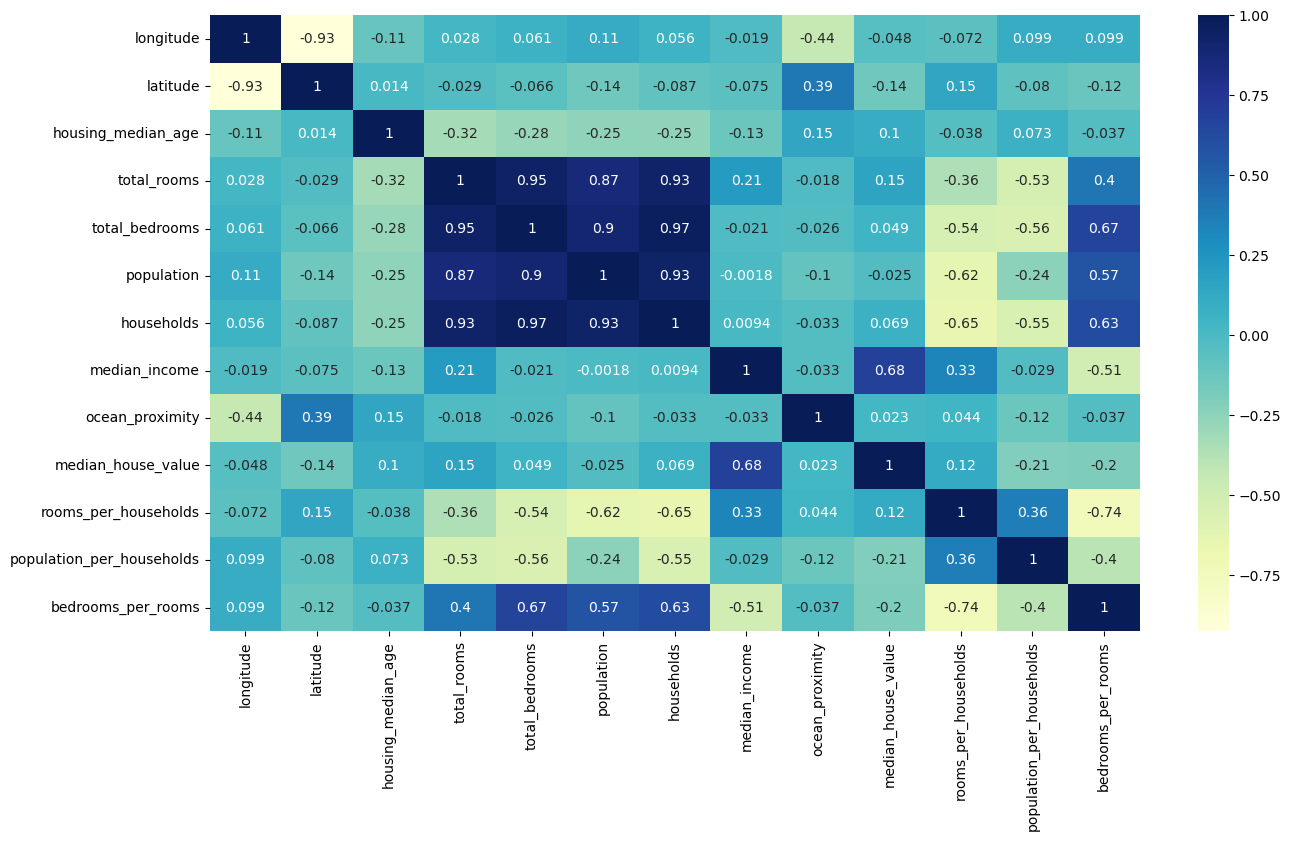

In [53]:
plt.figure(figsize=(15,8))
sns.heatmap(data_1_train.corr(), annot=True, cmap="YlGnBu")

In [55]:
data_1_train.corr()["median_house_value"]

longitude                   -0.047767
latitude                    -0.140791
housing_median_age           0.102302
total_rooms                  0.152920
total_bedrooms               0.048890
population                  -0.024916
households                   0.068746
median_income                0.683792
ocean_proximity              0.023029
median_house_value           1.000000
rooms_per_households         0.117010
population_per_households   -0.206831
bedrooms_per_rooms          -0.199250
Name: median_house_value, dtype: float64

In [57]:
from sklearn.linear_model import LinearRegression

(X_train, y_train) = data_1_train.drop(['median_house_value'], axis=1), data_1_train['median_house_value']

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [58]:
data_1_test = X_test.join(y_test)

data_1_test['total_rooms'] = np.log(data_1_test['total_rooms'] + 1)
data_1_test['total_bedrooms'] = np.log(data_1_test['total_bedrooms'] + 1)
data_1_test['population'] = np.log(data_1_test['population'] + 1)
data_1_test['households'] = np.log(data_1_test['households'] + 1)

data_1_test['ocean_proximity'] = data_1_test['ocean_proximity'].map(numerical_mapping)

data_1_test["rooms_per_households"] = data_1_test["total_rooms"]/data_1_test["households"]
# le nombre de piece dans un foyer par le nombre d'occupant 
#
data_1_test["population_per_households"] = data_1_test["population"]/data_1_test["households"]
# 
data_1_test["bedrooms_per_rooms"]= data_1_test["total_bedrooms"]/data_1_test["total_rooms"]

In [59]:
data_1_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_households,population_per_households,bedrooms_per_rooms
15766,-122.43,37.77,52.0,8.388905,7.018402,7.570443,6.960348,2.7587,4,354500.0,1.205242,1.087653,0.836629
860,-121.96,37.58,15.0,8.182000,6.393591,7.483244,6.327937,5.7192,1,283500.0,1.292997,1.182573,0.781421
8466,-118.34,33.92,6.0,6.954639,5.605802,6.608001,5.517453,3.4250,1,193800.0,1.260480,1.197654,0.806052
13821,-117.23,34.49,9.0,8.307953,6.285998,7.285507,6.171701,5.4201,2,170600.0,1.346137,1.180470,0.756624
1347,-121.92,38.01,7.0,7.398174,5.517453,6.779922,5.572154,6.1237,2,166000.0,1.327705,1.216751,0.745786
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,-118.82,35.20,34.0,7.689829,6.152733,7.555382,6.122493,2.1136,2,57300.0,1.255996,1.234037,0.800113
20471,-118.77,34.26,26.0,8.019284,6.150603,7.509883,6.150603,5.6385,1,196900.0,1.303821,1.221000,0.766977
9678,-118.99,37.65,20.0,7.813996,6.439350,5.826000,4.955827,5.0100,2,195500.0,1.576729,1.175586,0.824079
10004,-121.06,39.04,14.0,7.409742,5.634790,6.452049,5.568345,4.2802,2,194800.0,1.330690,1.158701,0.760457


In [60]:
(X_test, y_test) = data_1_test.drop(['median_house_value'], axis=1), data_1_test['median_house_value']

y_pred = model.predict(X_test)
y_pred

array([276271.91838885, 272025.82444719, 185307.58281183, ...,
       222341.12276614, 125575.6852686 , 317255.47861808])

In [61]:
# Metrics pour mesurer la performance du modele
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred) # Plus est petit plus c'est bien
r2 = r2_score(y_test, y_pred)

print("mse :", mse)
print("r2 :", r2)

mse : 4460216361.536179
r2 : 0.6734857558050642


# 2nd Modele : 

In [62]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()

model2.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
y_pred_1 = model2.predict(X_test)
y_pred_1

array([392704.05, 279105.02, 184671.  , ..., 196607.05, 200756.  ,
       338454.03])

In [64]:
# Metrics pour mesurer la performance du modele
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_1) # Plus est petit plus c'est bien
r2 = r2_score(y_test, y_pred_1)

print("mse :", mse)
print("r2 :", r2)

mse : 2423142628.9355307
r2 : 0.8226116134440361
